## Microlensing on Single Lens within SLSim
### Author: [Paras Sharma](https://github.com/timedilatesme)

Note that you need CUDA GPU support to run this code.

In [90]:
from matplotlib import pyplot as plt
import numpy as np
from slsim.Util.astro_util import theta_star_physical

from astropy.cosmology import FlatLambdaCDM

from astropy import units as u

from slsim.LOS.los_individual import LOSIndividual
from slsim.Sources.source import Source
from slsim.Deflectors.deflector import Deflector
from slsim.lens import Lens

### Define the Lens

In [ ]:
def lens_instance_with_variability():
    # quasar and host galaxy dict. One can avoid host galaxy information and simulate
    # lensed quasar only.
    source_dict_quasar = {
        "z": 1.5,
        "ps_mag_i": 21,
        "angular_size": 0.10887651129362959,
        "mag_i": 20,
        "e1": 0.0,
        "e2": 0.0,
        "n_sersic": 1.5547096361698418,
        "center_x": 0.046053505877290584,
        "center_y": -0.09071283196326566,
    }

    deflector_dict_quasar = {
        "z": 0.501666913484551,
        "M": -21.83145200238993,
        "coeff": [0.141014265858706, 9.517770703665604e-05],
        "ellipticity": 0.2284277382812588,
        "physical_size": 4.206949315885421,
        "stellar_mass": 362262853208.36945,
        "angular_size": 0.6879678734773863,
        "mag_g": 21.867784201009997,
        "mag_r": 20.33108481157918,
        "mag_i": 19.493883022638812,
        "mag_z": 19.105662758016145,
        "mag_y": 18.86764491626696,
        "galaxy_type": "red",
        "vel_disp": 225.65292910480588,
        "e1_light": -0.11571475911179421,
        "e2_light": -0.0025994949173672476,
        "e1_mass": -0.17804791091757563,
        "e2_mass": 0.040020226664717634,
        "n_sersic": 4.0,
        "theta_E": 1.5,
        "gamma_pl": 2.0,
        "center_x": 0.0316789,
        "center_y": -0.0400549,
    }
    variable_agn_kwarg_dict = {
        "length_of_light_curve": 5000,
        "time_resolution": 1,
        "log_breakpoint_frequency": 1 / 20,
        "low_frequency_slope": 1,
        "high_frequency_slope": 3,
        "standard_deviation": 0.9,
    }
    kwargs_quasar = {
        "pointsource_type": "quasar",
        "extendedsource_type": "None",
        "variability_model": "light_curve",
        "kwargs_variability": {"agn_lightcurve", "i", "r"},
        "agn_driving_variability_model": "bending_power_law",
        "agn_driving_kwargs_variability": variable_agn_kwarg_dict,
        "lightcurve_time": np.linspace(0, 5000, 1000),
    }

    cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

    source_quasar = Source(
        source_dict=source_dict_quasar,
        cosmo=cosmo,
        source_type="point_source",
        **kwargs_quasar,
    )
    deflector_quasar = Deflector(
        deflector_type="EPL",
        deflector_dict=deflector_dict_quasar,
    )

    los_class = LOSIndividual(
        kappa=-0.028113857977090363,
        gamma=[0.01118681739734637, -0.012498985117640523],
    )

    lens_class = Lens(
        source_class=source_quasar,
        deflector_class=deflector_quasar,
        cosmo=cosmo,
        los_class=los_class,
    )

    return lens_class

lens_class = lens_instance_with_variability()

### Setup the Microlensing Parameters (E.g. AGN Quasar)

In [97]:
band = "i"

# Einstein radius of a unit mass point lens in arcsec units.
theta_star, _, _ = theta_star_physical(
    z_lens=lens_class.deflector_redshift,
    z_src=lens_class.source_redshift_list[0],
    m=1,
    cosmo=lens_class.cosmo,
)
theta_star = theta_star.to(u.arcsec).value

# Print the microlensing parameters like kappa, kappa_star, gamma
kappa_star_images, kappa_tot_images, shear_images, shear_angle_images = (
    lens_class._microlensing_parameters_for_image_positions_single_source(
        band=band, source_index = 0
    )
)
print("kappa_star_images: ", kappa_star_images)
print("kappa_tot_images:  ", kappa_tot_images)
print("shear_images:      ", shear_images)
print("theta_star:       ", theta_star, "arcsec")
print("deflector_redshift: ", lens_class.deflector_redshift)
print("source_redshift:    ", lens_class.source_redshift_list[0])

kwargs_MagnificationMap = {
    "theta_star": theta_star,  # arcsec
    "center_x": 0,  # arcsec
    "center_y": 0,  # arcsec
    "half_length_x": 2 * theta_star,  # arcsec
    "half_length_y": 2 * theta_star,  # arcsec
    "mass_function": "kroupa",
    "m_solar": 1.0,
    "m_lower": 0.08,
    "m_upper": 100,
    "num_pixels_x": 1000,
    "num_pixels_y": 1000,
}
kwargs_agn_source_morphology = {
    "source_redshift": lens_class.source_redshift_list[0],
    "cosmo": lens_class.cosmo,
    "r_out": 1000,
    "r_resolution": 1000,
    "smbh_mass_exp": 8,
    "inclination_angle": 0,
    "black_hole_spin": 0,
    # "observer_frame_wavelength_in_nm": 600,
    "observing_wavelength_band":band,
    "eddington_ratio": 0.1,
}

kwargs_microlensing = {"kwargs_MagnificationMap":kwargs_MagnificationMap, 
                       "point_source_morphology": 'agn',
                       "kwargs_source_morphology": kwargs_agn_source_morphology}

keyword corona_height is not defined, using default value of: 10
keyword r_resolution is not defined, using default value of: 500


/home/paras/.venv/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/paras/.venv/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/paras/.venv/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/paras/.venv/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


kappa_star_images:  [0.07553294 0.0881864  0.18566828 0.19725182]
kappa_tot_images:   [0.36058195 0.38686452 0.63741294 0.64748044]
shear_images:       [0.37412747 0.40103482 0.68145043 0.6874948 ]
theta_star:        1.9115980752342478e-06 arcsec
deflector_redshift:  0.501666913484551
source_redshift:     1.5


### Get the Light Curves

In [98]:
time_array = np.linspace(0, 5000, 1000)

mags_list_unlensed = lens_class.point_source_magnitude(
    band=band,
    lensed=False,
    time = time_array,
    microlensing=False,
)

mags_list_macrolensing = lens_class.point_source_magnitude(
    band=band,
    lensed=True,
    time = time_array,
    microlensing=False,
)

mags_list_microlensing = lens_class.point_source_magnitude(
    band=band,
    lensed=True,
    time = time_array,
    microlensing=True,
    kwargs_microlensing=kwargs_microlensing,
);

Generating magnification map ...
Done generating magnification map.
Generating magnification map ...
Done generating magnification map.
Generating magnification map ...
Done generating magnification map.
Generating magnification map ...
Done generating magnification map.


In [102]:
print("mags_list_unlensed", mags_list_unlensed[0])
print("--"*20)
print("mags_list_macrolensing", mags_list_macrolensing[0])
print("--"*20)
print("mags_list_microlensing", mags_list_microlensing[0])

mags_list_unlensed 21.0
----------------------------------------
mags_list_macrolensing [[18.59869007 18.71839122 18.83809237 ... 18.85177843 18.89934938
  18.94692033]
 [18.35640963 18.35640963 18.35640963 ... 18.46594824 18.51351919
  18.56109014]
 [18.83057919 18.83057919 18.83057919 ... 18.75439833 18.80196928
  18.84954023]
 [18.87990746 18.87990746 18.87990746 ... 18.78842246 18.83599341
  18.88356436]]
----------------------------------------
mags_list_microlensing [[19.03730774 19.15699833 19.27668893 ... 19.27719718 19.32475176
  19.37230634]
 [18.83231306 18.83231439 18.83231572 ... 18.94327951 18.99085154
  19.03842358]
 [20.87267955 20.86776182 20.8628441  ... 20.41046337 20.45806328
  20.5056632 ]
 [17.96416733 17.96385954 17.96355174 ... 19.34810276 19.39661019
  19.44511762]]


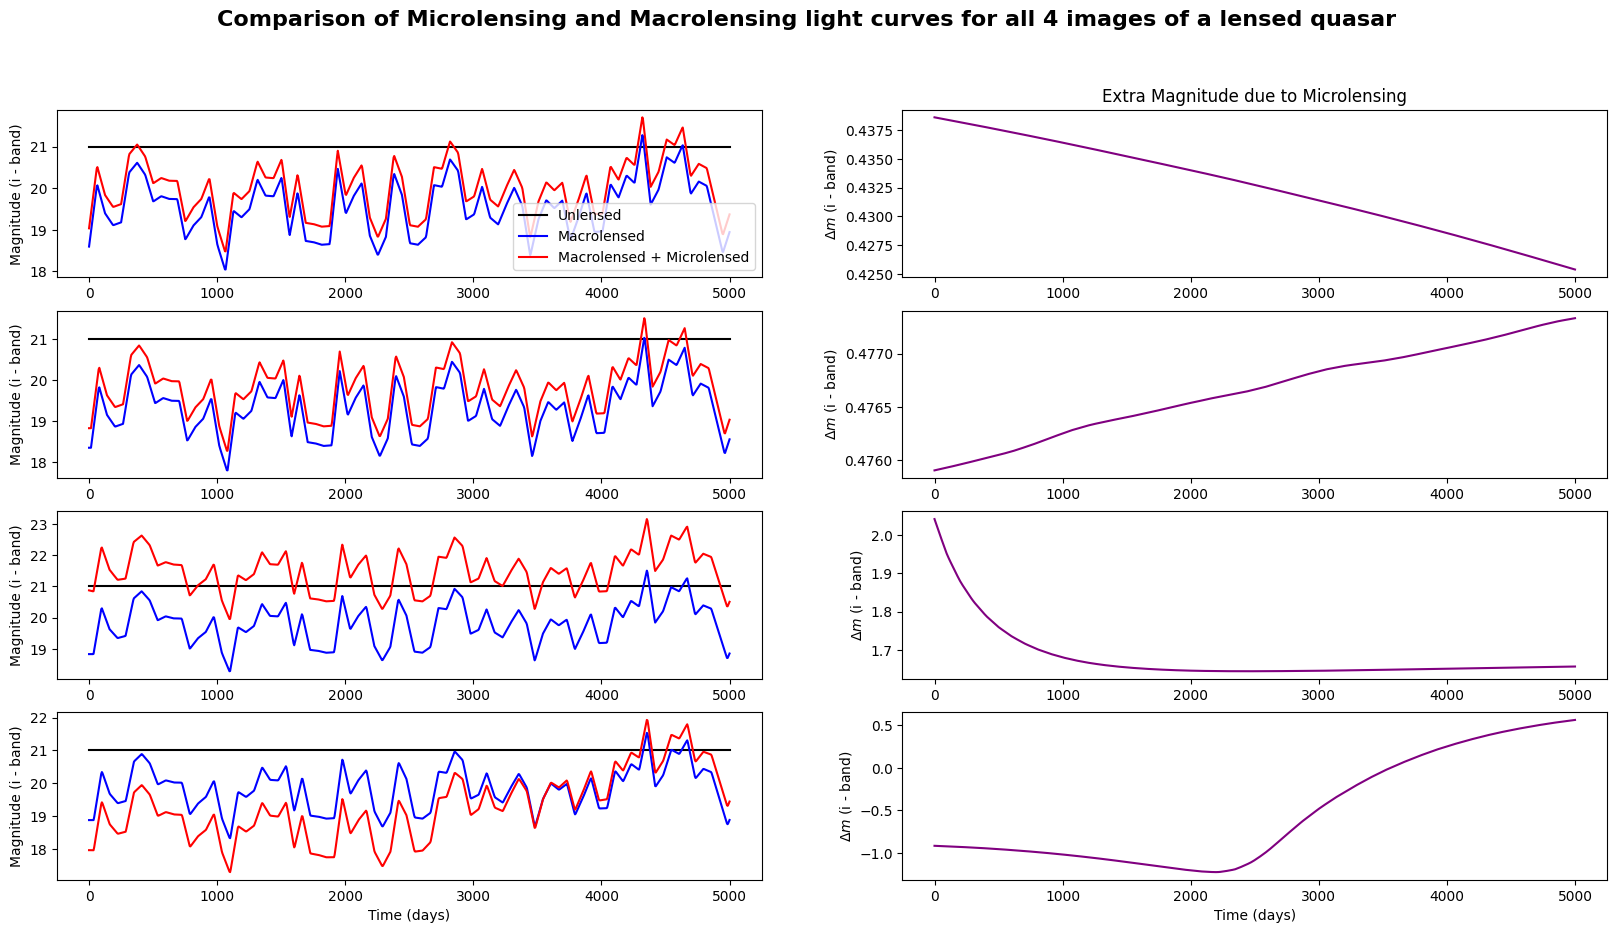

In [103]:
## Compare the light curves

fig, ax = plt.subplots(lens_class.image_number[0], 2, figsize=(20, 10))

for img_idx in range(lens_class.image_number[0]):
    # Unlensed
    ax[img_idx, 0].plot(
        time_array,
        mags_list_unlensed[0]*np.ones_like(time_array),
        label="Unlensed",
        color="black",
    );

    # Only Macrolensed
    ax[img_idx, 0].plot(
        np.tile(time_array, (len(mags_list_macrolensing[0]), 1))[img_idx],
        mags_list_macrolensing[0][img_idx],
        label="Macrolensed",
        color="blue",
    );
    # Both Macrolensed and Microlensed
    ax[img_idx, 0].plot(
        np.tile(time_array, (len(mags_list_microlensing[0]), 1))[img_idx],
        mags_list_microlensing[0][img_idx],
        label="Macrolensed + Microlensed",
        color="red",
    );
    ax[img_idx, 0].set_ylabel(f"Magnitude ({band} - band)")

    # Only Microlensing Magnitudes
    ax[img_idx, 1].plot(
        np.tile(time_array, (len(mags_list_microlensing[0]), 1))[img_idx],
        mags_list_microlensing[0][img_idx] - mags_list_macrolensing[0][img_idx],
        label="Microlensed",
        color="purple",
    );
    ax[img_idx, 1].set_ylabel(f"$\\Delta m$ ({band} - band)")

ax[0, 0].legend()
ax[3, 0].set_xlabel("Time (days)")

ax[0, 1].set_title("Extra Magnitude due to Microlensing")
ax[3, 1].set_xlabel("Time (days)")

fig.suptitle(
    f"Comparison of Microlensing and Macrolensing light curves for all {lens_class.image_number[0]} images of a lensed quasar",
    fontsize=16,
    fontweight="bold",);